# Tutorial - Big Data

## Tutorial 6

**Objetivo:**  
Que se familiaricen con las técnicas de Regularización de Ridge y Lasso 

### Temario:
- Regularización con Ridge
- Regularización con Lasso
- Ejemplo con la base de hitters 

### Modelos lineales regularizados con Ridge y Lasso

Exploraremos brevemente el conjunto de datos "Hitters" y usaremos la librería de sklearn para ajustar modelos lineales regularizados por Ridge y Lasso (son las siglas en inglés para: operador de selección y contracción mínima absoluta) con el fin de predecir el salario de los jugadores de béisbol.

Esta es una adaptación del Lab de Linear Models and Regularization Methods del libro "Introduction to Statistical Learning with Applications in Python" de Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani y Jonathan Taylor. [Acá](https://islp.readthedocs.io/en/latest/labs/Ch06-varselect-lab.html) pueden encontrar más información

##### Baseball data, 'Hitters'
Datos de la Major League de Baseball Data en las temporadas 1986 y 1987.
La base de Hitters tiene las siguientes variables:
- AtBat: Number of times at bat in 1986
- Hits: Number of hits in 1986
- HmRun: Number of home runs in 1986
- Runs: Number of runs in 1986
- RBI: Number of runs batted in in 1986
- Walks: Number of walks in 1986
- Years: Number of years in the major leagues
- CAtBat: Number of times at bat during his career
- CHits: Number of hits during his career
- CHmRun: Number of home runs during his career
- CRuns: Number of runs during his career
- CRBI: Number of runs batted in during his career
- CWalks: Number of walks during his career
- League: A factor with levels A and N indicating player’s league at the end of 1986
- Division: A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts: Number of put outs in 1986
- Assists: Number of assists in 1986
- Errors: Number of errors in 1986
- Salary: 1987 annual salary on opening day in thousands of dollars
- NewLeague: A factor with levels A and N indicating player’s league at the beginning of 1987


Nuestro objetivo será **predecir el salario**

### 1. Leer el conjunto de datos y explorar la estructura de datos 

In [20]:
# Importamos los paquetes necesarios
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Les dejo la documentación para que puedan comparar:
- [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) --> Lasso usa una penalidad llamada l1 (que fuerza algunos coeficientes para que sean iguales a 0, seleccionando variables) y Ridge usa una penalidad llamada l2 (que hace que algunos coeficientes sean más cercanos a 0 pero sin llegar a 0)
- [linear_model()](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) --> [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) y [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)


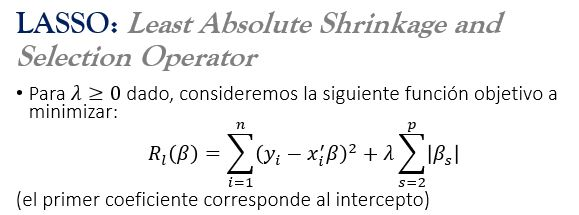

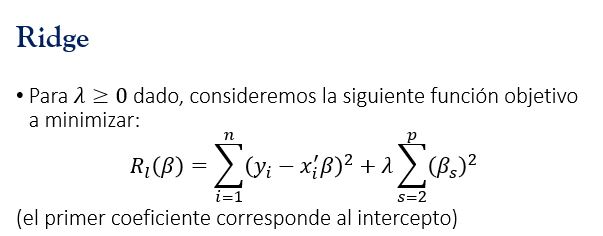

In [21]:
Hitters = load_data('Hitters')
print('Dimensión de la base:', Hitters.shape, '\n')
print(Hitters.info())
# Eliminamos missings en la variable dependiente
print('\nMissings en variable dependiente:', np.isnan(Hitters['Salary']).sum())

Hitters = Hitters.dropna() 
print('\n Nueva dimensión de la base:', Hitters.shape)

Dimensión de la base: (322, 20) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 


In [22]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [23]:
Hitters.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


### 2. Preparar las X e Y que usaremos en el modelo

Aquí seleccionamos las variables que utilizaremos en nuestro modelo y transformamos a dummies las que son strings

In [24]:
y = Hitters.Salary

In [25]:
print(Hitters.League.value_counts())
print(Hitters.Division.value_counts())
print(Hitters.NewLeague.value_counts())

# Creamos variables dummies para las variables string
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']], drop_first=True)
dummies

League
A    139
N    124
Name: count, dtype: int64
Division
W    134
E    129
Name: count, dtype: int64
NewLeague
A    141
N    122
Name: count, dtype: int64


,League_N,Division_W,NewLeague_N
1,True,True,True
2,False,True,False
3,True,False,True
4,True,False,True
5,False,True,False
...,...,...,...
317,True,False,True
318,False,False,False
319,False,True,False
320,False,False,False


In [26]:
# Definimos las variables que incluiremos en el set de X

# Eliminamos salarios (porque es nuestra y) y las columnas de strings
X_ = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f

### 3. Dividimos la base en observaciones para entrenamiento y testeo

Ahora dividimos la muestra en un conjunto de entrenamiento y un conjunto de prueba para luego estimar el error en el conjunto de prueba. 

In [27]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Revisamos cuantas observaciones quedaron para Test y cuantas para Entrenamiento.
print(f'El conjunto de entrenamiento tiene {len(X_train)} observaciones.')
print(f'El conjunto de test tiene {len(X_test)} observaciones.')

El conjunto de entrenamiento tiene 210 observaciones.
El conjunto de test tiene 53 observaciones.


### 4. Regularización

Usamos la funciones [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) y [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) para realizar distintas regresiones lineales regularizadas. Estas funciones tienen un argumento **alfa** (es el **λ** pero con otro nombre) que **controla el peso de la regularización**.

Generaremos una matriz de valores alfa que van desde muy grandes a muy pequeños, esencialmente cubriendo la gama completa de escenarios desde el modelo nulo que contiene solo la intersección, hasta el ajuste de mínimos cuadrados.

Estandarizamos los datos y ajustamos los modelos Lasso para cada valor de alfa.

In [28]:
# Matriz de valores de alfa
alphas = 10**np.linspace(6,-2,50)*0.5
np.set_printoptions(suppress = True)
alphas

array([500000.        , 343324.42250215, 235743.31817287, 161872.87714088,
       111149.82412631,  76320.89835876,  52405.65670773,  35984.28365006,
        24708.56680662,  16966.10885948,  11649.75905258,   7999.29359803,
         5492.70570994,   3771.56003168,   2589.73733962,   1778.24015311,
         1221.02654727,    838.41646841,    575.69769966,    395.30216055,
          271.43377197,    186.37968602,    127.97739613,     87.87553124,
           60.33963203,     41.43213864,     28.44933015,     19.53469969,
           13.41347898,      9.21034985,      6.32427608,      4.34255687,
            2.98181166,      2.04745753,      1.40588435,      0.96534886,
            0.66285568,      0.45514909,      0.3125276 ,      0.21459671,
            0.14735259,      0.10117948,      0.06947477,      0.04770477,
            0.03275643,      0.02249216,      0.01544422,      0.01060475,
            0.00728174,      0.005     ])

#### Importante si aplicamos regularización: estandarizar las variables

Utilizaremos [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para estandarizar las variables restando la media y escalando a la varianza de la unidad. La estandarización se calcula como:

z = (x - u) / s

donde u es la media de las muestras de entrenamiento (o cero si with_mean=False), y s es la desviación estándar de las muestras de entrenamiento (o uno si with_std=False).

In [29]:
from sklearn.preprocessing import StandardScaler

# Estadisticas antes de estandarizar
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,210.0,402.185714,146.677489,19.0,279.25,414.0,521.75,687.0
Hits,210.0,107.357143,44.779535,1.0,70.25,103.0,141.75,238.0
HmRun,210.0,11.457143,8.596793,0.0,5.00,9.0,17.00,40.0
Runs,210.0,54.771429,25.677521,0.0,33.00,53.0,72.75,130.0
RBI,210.0,50.738095,25.231995,0.0,31.25,46.5,71.00,121.0
Walks,210.0,41.861905,21.884538,0.0,26.00,37.5,58.00,105.0
Years,210.0,7.228571,4.871079,1.0,4.00,6.0,10.00,24.0
CAtBat,210.0,2614.109524,2316.302364,19.0,807.50,1823.0,3916.75,14053.0
CHits,210.0,708.976190,654.306517,4.0,195.25,473.0,1058.00,4256.0
CHmRun,210.0,67.023810,82.361872,0.0,14.25,39.0,83.00,548.0


In [30]:
# Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Estandarizamos las observaciones de test
X_test_transformed = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)

# Estadisticas luego de estandarizar
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,210.0,-1.654761e-16,1.002389,-2.618679,-0.840139,0.080738,0.817099,1.946412
Hits,210.0,-7.824429e-17,1.002389,-2.380804,-0.830643,-0.097535,0.769884,2.924439
HmRun,210.0,2.114711e-17,1.002389,-1.335907,-0.752905,-0.286504,0.646299,3.328108
Runs,210.0,-3.383537e-17,1.002389,-2.138147,-0.849905,-0.069152,0.701841,2.936745
RBI,210.0,-1.057355e-16,1.002389,-2.015668,-0.774202,-0.168366,0.804943,2.791289
Walks,210.0,5.498247e-17,1.002389,-1.917424,-0.726532,-0.199791,0.739182,2.891949
Years,210.0,-8.458842e-18,1.002389,-1.281740,-0.664388,-0.252820,0.570315,3.451290
CAtBat,210.0,-1.141944e-16,1.002389,-1.123044,-0.781818,-0.342356,0.563723,4.950227
CHits,210.0,0.000000e+00,1.002389,-1.080015,-0.787022,-0.361513,0.534700,5.433997
CHmRun,210.0,7.824429e-17,1.002389,-0.815717,-0.642286,-0.341065,0.194439,5.853746


#### Plot Ridge: coeficientes según parámetros de ajuste alfa

Ahora veamos la relación entre alfa y los coeficientes, una línea para cada característica.

In [31]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_transformed, y_train)
    coefs.append(ridge.coef_)

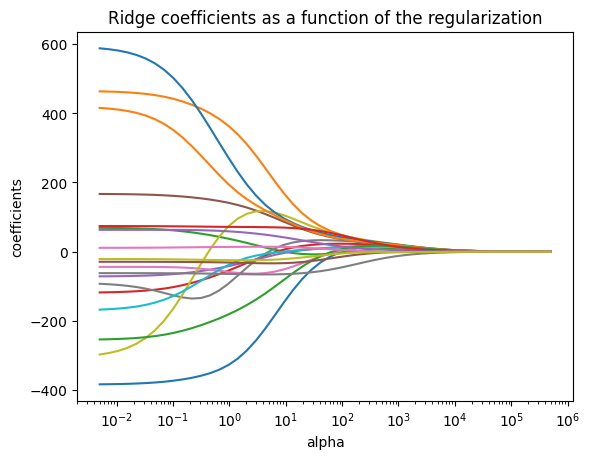

In [32]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

En el lado izquierdo casi no hay penalización, por lo que se pueden observar todos los valores que toman los coeficientes de las disttintas variables. En el lado derecho podemos ver un modelo con coeficientes muy cercanos a cero. Esto se debe a una penalización muy alta. 

### 5. Regresión con Ridge

Probemos elegir arbitrariamente el alpha usando $\lambda = 1$:

In [33]:
alpha = 1
print("Alpha:", alpha)

ridge_a1 = Ridge(alpha = alpha)
ridge_a1.fit(X_train_transformed, y_train)             
pred_a1 = ridge_a1.predict(X_test_transformed)
ecm_a1 = mean_squared_error(y_test, pred_a1)

print("Error cuadrático medio: ", ecm_a1)   
print("Coeficientes del modelo:")
print(pd.Series(ridge_a1.coef_, index = X_train_transformed.columns)) 

Alpha: 1
Error cuadrático medio:  117045.46461772858
Coeficientes del modelo:
AtBat         -325.992301
Hits           361.240455
HmRun           36.784653
Runs           -53.694255
RBI            -41.413102
Walks          140.512587
Years          -58.939049
CAtBat         -90.255115
CHits           75.859425
CHmRun         -37.298171
CRuns          267.046898
CRBI           192.265967
CWalks        -180.192367
PutOuts         71.509534
Assists         58.503281
Errors         -31.563546
League_N        13.581323
Division_W     -64.543365
NewLeague_N    -24.796406
dtype: float64


El ECM con alpha = 1 es 117.045. 

Ahora probemos que pasa con un alpha muy grande, por ej. $10^{10}$:

In [34]:
alpha = 10**10
print("Alpha:", alpha)

ridge_a10b = Ridge(alpha)
ridge_a10b.fit(X_train_transformed, y_train)             
pred_a10b = ridge_a10b.predict(X_test_transformed)  
ecm_a10b = mean_squared_error(y_test, pred_a10b)

print("Error cuadrático medio: ", ecm_a10b)   
print("Coeficientes del modelo:")
print(pd.Series(ridge_a10b.coef_, index = X_train_transformed.columns)) 

Alpha: 10000000000
Error cuadrático medio:  283168.48871122923
Coeficientes del modelo:
AtBat          3.296037e-06
Hits           3.757352e-06
HmRun          2.642696e-06
Runs           3.401537e-06
RBI            3.514776e-06
Walks          3.495684e-06
Years          3.577147e-06
CAtBat         4.613872e-06
CHits          4.806258e-06
CHmRun         4.008038e-06
CRuns          4.813592e-06
CRBI           4.704480e-06
CWalks         4.112546e-06
PutOuts        2.138120e-06
Assists        6.705476e-07
Errors        -1.220194e-08
League_N      -8.207404e-07
Division_W    -1.775311e-06
NewLeague_N   -6.939089e-07
dtype: float64


El ECM con alpha de 10 a la 10 es 283.168.

Esta gran penalización reduce los coeficientes en un grado muy grande, esencialmente reduciéndose a un modelo que contiene solo el intercepto. Esta contracción excesiva hace que el modelo sea demasiado sesgado, lo que resulta en un ECM más alto.

Bien, entonces ajustar un modelo de regresión de Ridge con alpha = 1 conduce a un ECM de prueba más bajo que ajustar un modelo con solo una intersección. 

Ahora verificamos si existe algún beneficio al realizar la regresión de Ridge con alpha = 1 en lugar de simplemente realizar la regresión por mínimos cuadrados. 

In [37]:
from sklearn.linear_model import LinearRegression
modelo_lineal = LinearRegression().fit(X_train_transformed, y_train)
pred_lin = modelo_lineal.predict(X_test_transformed)
ecm_lin = mean_squared_error(y_test, pred_lin)

print("Error cuadrático medio: ", ecm_lin) 
print("Coeficientes de la regresión lineal:")
print(pd.Series(modelo_lineal.coef_, index = X_train_transformed.columns)) 

Error cuadrático medio:  120624.70030162518
Coeficientes de la regresión lineal:
AtBat         -384.247362
Hits           464.662684
HmRun           69.179615
Runs          -118.967845
RBI            -71.880909
Walks          166.990660
Years          -44.071458
CAtBat         -89.931419
CHits         -307.208663
CHmRun        -170.460936
CRuns          593.424690
CRBI           419.797090
CWalks        -255.177125
PutOuts         73.929494
Assists         62.913686
Errors         -29.338178
League_N        10.885125
Division_W     -62.199026
NewLeague_N    -21.183372
dtype: float64


El modelo con Ridge es mejor que el de mínimos cuadrados ordinarios al comparar los ECM. 
Como era de esperar, ninguno de los coeficientes es exactamente cero. Recordar: la regresión de Ridge no realiza  selección de variables!

Ahora, en lugar de elegir arbitrariamente alpha $ = 1 $, sería mejor usar la validación cruzada para elegir el parámetro de ajuste alpha. 

#### Ridge con validación cruzada 

Nuevamente, realizamos una validación cruzada con k=5 para elegir el mejor alfa, reajustar el modo, calcular el error de prueba asociado e imprimir los mejores coeficientes de modelos. Esta vez regularizando con [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [38]:
ridgecv = RidgeCV(alphas=alphas, cv=5).fit(X_train_transformed, y_train)
print("El mejor alpha:", ridgecv.alpha_)

# Ahora con el alpha óptimo, volvemos a estimar nuestro modelo
ridge = Ridge(alpha=ridgecv.alpha_)
ridge = ridge.fit(X_train_transformed, y_train)
ridge_pred = ridge.predict(X_test_transformed)
ecm_ridge = mean_squared_error(y_test, ridge_pred)

print("Error cuadrático medio: ", ecm_ridge)   

print("Coeficientes del mejor modelo:")
print(pd.Series(ridgecv.coef_, index = X_train_transformed.columns)) 

El mejor alpha: 2.0474575311902137
Error cuadrático medio:  116458.5767180939
Coeficientes del mejor modelo:
AtBat         -285.530137
Hits           310.164169
HmRun           25.102887
Runs           -32.711024
RBI            -29.688806
Walks          127.302545
Years          -63.507386
CAtBat         -46.069631
CHits          109.433830
CHmRun         -17.967654
CRuns          193.568379
CRBI           151.294372
CWalks        -154.293116
PutOuts         71.159721
Assists         54.694675
Errors         -32.750353
League_N        13.942094
Division_W     -65.457307
NewLeague_N    -24.975866
dtype: float64


### 6. Lasso con validación cruzada 

Realizamos una validación cruzada de 5 veces para elegir el mejor alfa, reajustar el modelo, calcular el error de prueba asociado e imprimir los mejores coeficientes de modelos.

In [39]:
# Usamos cross-validation para dividir la muestra en training y validation sets
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=100000, random_state=100)
lassocv.fit(X_train_transformed, y_train)
print("Alpha óptimo:", lassocv.alpha_)

# Ahora estimamos nuevamente el modelo con el alpha (lambda) óptimo
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train_transformed, y_train)
lasso_pred = lasso.predict(X_test_transformed)

print("Error cuadrático medio: ", mean_squared_error(y_test, lasso_pred))
print("Coeficientes del mejor modelo:")
pd.Series(lasso.coef_, index=X_train_transformed.columns)

# Para guardarlo en un dataframe...
coeficientes_finales = pd.DataFrame([np.array(X_train_transformed.columns.tolist()),lasso.coef_]).T
coeficientes_finales.columns = ['feature','coeficiente']
print(f"El modelo final cuenta con: {coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]}",'features' )
coeficientes_finales

Alpha óptimo: 2.981811658297324
Error cuadrático medio:  115605.87056368138
Coeficientes del mejor modelo:
El modelo final cuenta con: 13 features


,feature,coeficiente
0,AtBat,-290.477033
1,Hits,298.37508
2,HmRun,0.0
3,Runs,-0.0
4,RBI,-0.0
5,Walks,103.545454
6,Years,-41.852551
7,CAtBat,0.0
8,CHits,62.083528
9,CHmRun,0.0


Ahora algunos coeficientes son exactamente cero. Por lo tanto, **Lasso** tiene una ventaja sustancial sobre la regresión de Ridge en que **realiza una selección de las variables del modelo**. 
Para completar la imagen, necesitamos los resultados de validación cruzada correspondientes de la regresión de la Ridge.

### Performance de los modelos regularizados con Ridge y con Lasso con Cross-validation:

In [40]:
print("Error cuadrático medio con Ridge: ", mean_squared_error(y_test, ridge_pred))
print("Error cuadrático medio con Lasso: ", mean_squared_error(y_test, lasso_pred))

Error cuadrático medio con Ridge:  116458.5767180939
Error cuadrático medio con Lasso:  115605.87056368138


#### Resumen
Con alpha elegido por validación cruzada el error cuadrático medio del Lasso es un poco mejor que el de regresión de Ridge. 

A su vez, Lasso tiene una gran ventaja sobre la regresión de Ridge, ya que produce modelos más simples e interpretables que involucran solo a un subconjunto de predictores.
